Task 4 - Renewables

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely import wkt
import cartopy
import cartopy.crs as ccrs
import numpy as np

In [2]:
##task4a
url='https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv'

data_set= pd.read_csv(url, sep=';', index_col=0)
data_set

,SiteID,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total
0,1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01
1,2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36
2,3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62
3,4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00
4,5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,5025,"SLOVNAFT, a.s.",Petrochémia SPC,Vlčie hrdlo 1,82412,Bratislava,Slovakia,POINT(17.17326 48.129706),Chemical industry,ETS,250126.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
5025,5026,IPEĽSKÉ TEHELNE a.s.,"IPEĽSKÉ TEHELNE, a.s., závod Breznička",závod Breznička,98502,Breznička,Slovakia,NaN,Non-metallic mineral products,ETS,2805.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00
5026,5027,IPEĽSKÉ TEHELNE a.s.,"IPEĽSKÉ TEHELNE a.s., závod Lučenec",závod Lučenec - časť Fabianka,98401,Lučenec,Slovakia,POINT(19.660555 48.326908),Non-metallic mineral products,ETS,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
5027,5028,VETROPACK NEMŠOVÁ s.r.o.,"Vetropack Nemšová, s.r.o.",Železničná 207/9,91441,Nemšová,Slovakia,POINT(18.121664 48.966788),Glass,ETS,52599.0,NaN,78475.00,125.99,0.00,25.19,0.00,25.19


In [3]:
##task4b
data_set['geom2'] = data_set['geom'].apply(lambda x: wkt.loads(x) if pd.notna(x) else None)

gdf = gpd.GeoDataFrame(data_set.dropna(subset=['geom2']), geometry='geom2', crs=4326)
gdf.set_index('SiteID')


,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total,geom2
SiteID,,,,,,,,,,,,,,,,,,
1,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01,POINT (15.06781 47.03378)
2,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36,POINT (14.34306 48.28194)
3,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62,POINT (16.08592 47.87225)
4,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00,POINT (16.49389 48.14472)
5,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62,POINT (13.77800 47.92278)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,"Pezinské tehelne - Paneláreň, a.s.",Výr. keram. výrobkov vypaľovaním - Pezin. tehelňa,Tehelná 9,90201,Pezinok,Slovakia,POINT(17.276015 48.284646),Non-metallic mineral products,ETS,4359.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,POINT (17.27602 48.28465)
5025,"SLOVNAFT, a.s.",Petrochémia SPC,Vlčie hrdlo 1,82412,Bratislava,Slovakia,POINT(17.17326 48.129706),Chemical industry,ETS,250126.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,POINT (17.17326 48.12971)
5027,IPEĽSKÉ TEHELNE a.s.,"IPEĽSKÉ TEHELNE a.s., závod Lučenec",závod Lučenec - časť Fabianka,98401,Lučenec,Slovakia,POINT(19.660555 48.326908),Non-metallic mineral products,ETS,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,POINT (19.66055 48.32691)


In [4]:
# Task 4c

missig_loc = data_set.geom.isnull()
missing_count = missig_loc.sum()

print(missing_count,'industrial sites are missing on its location')

515 industrial sites are missing on its location


In [5]:
# Task 4d
chk = gdf['Emissions_ETS_2014'].isna() & ~gdf['Emissions_EPRTR_2014'].isna()
gdf.loc[chk, 'Emissions_ETS_2014'] = gdf.loc[chk, 'Emissions_EPRTR_2014']
chk

0       False
1       False
2       False
3       False
4       False
        ...  
5019    False
5024    False
5026    False
5027    False
5028    False
Length: 4514, dtype: bool

/opt/anaconda3/envs/esm-2024/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


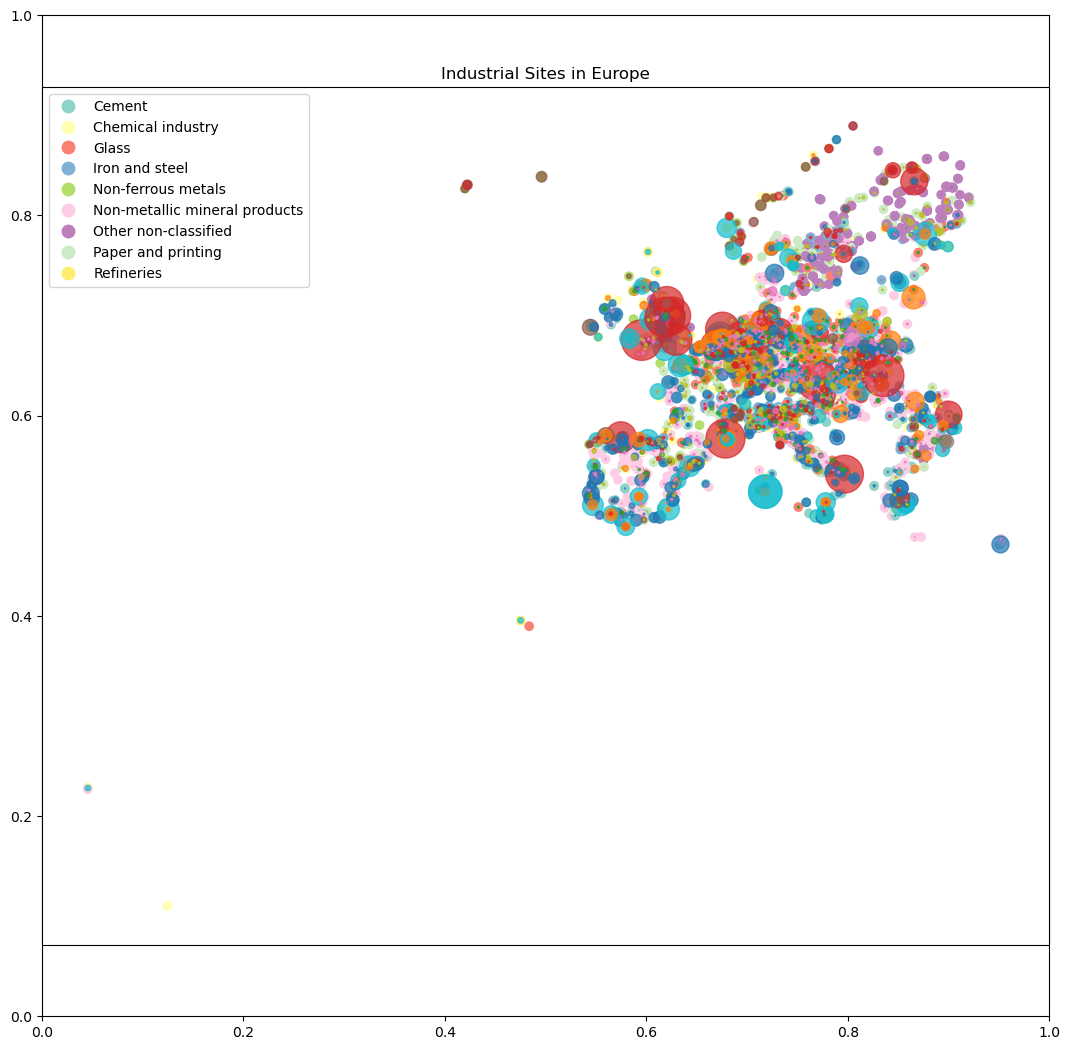

In [29]:
# Task 4e

fig, ax = plt.subplots(figsize=(13, 13))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
gdf.plot(column='Subsector', cmap='Set3', legend=True, legend_kwds={'loc': 'upper left'}, ax=ax)
gdf.plot(ax=ax, column='Subsector', markersize=gdf['Emissions_ETS_2014'].div(10000), alpha=0.7)
ax.set_title('Industrial Sites in Europe')
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)
plt.show()

/opt/anaconda3/envs/esm-2024/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


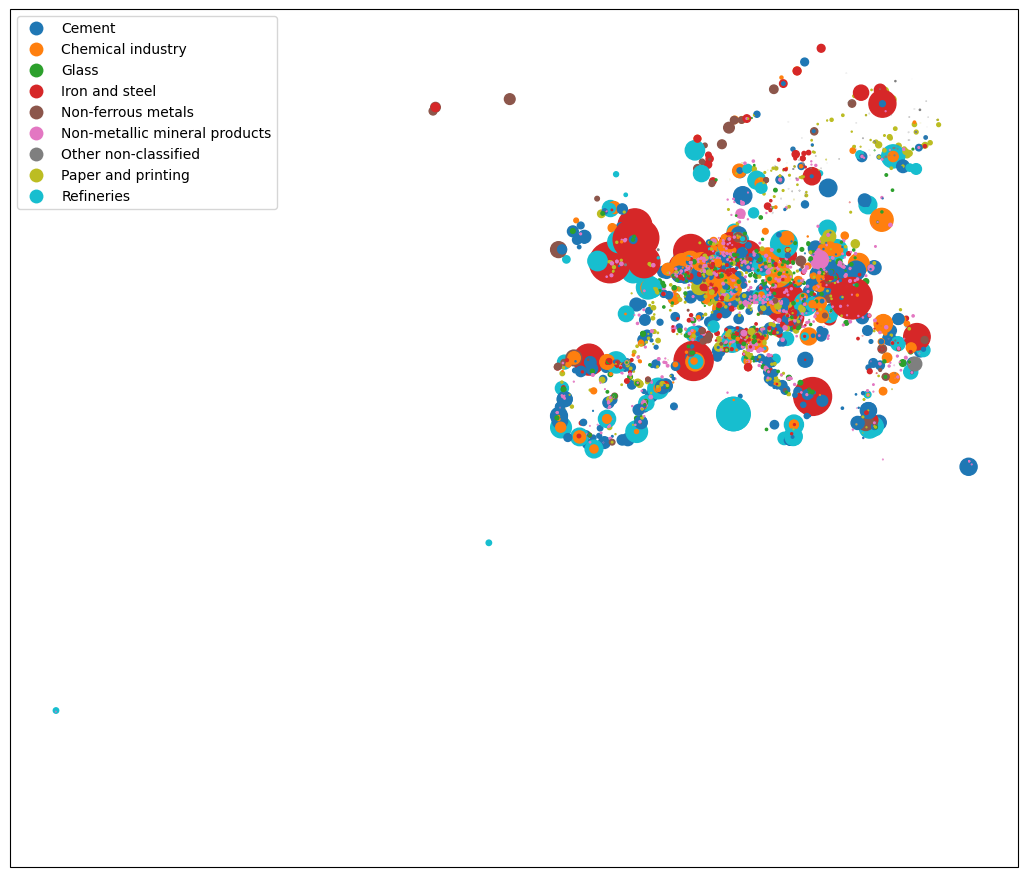

In [26]:
# Task 4e
##emiision data
##alternate

fig = plt.figure(figsize=(13,13))

ax = plt.axes(projection=ccrs.AlbersEqualArea())

gdf.plot(ax=ax,
        column='Subsector',
        legend=True,
        markersize=gdf.Emissions_ETS_2014/10000) # Divided by 10000 just to better view
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.3)

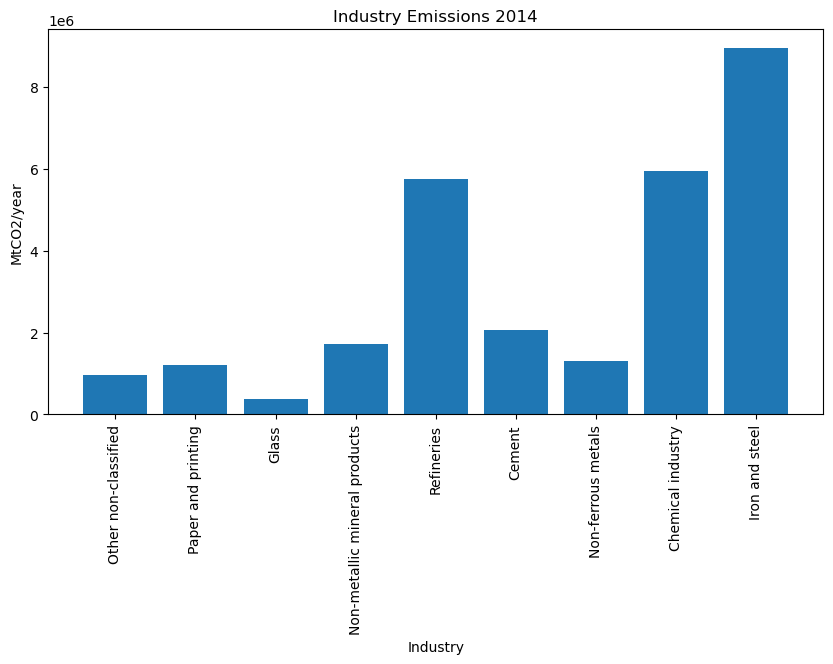

In [32]:
# Task 4f

gdf_sort = gdf.sort_values(by='Emissions_ETS_2014', ascending=True)

fig, ax = plt.subplots(figsize=(10, 5))



ax.bar(gdf_sort['Subsector'], gdf_sort['Emissions_ETS_2014'])

ax.set_title("Industry Emissions 2014")

ax.set_ylabel("MtCO2/year")

ax.set_xlabel("Industry")

plt.xticks(rotation='vertical')

plt.show()

In [33]:
# Task 4g
group_gdf = gdf.groupby("Subsector").Emissions_ETS_2014.sum()

top_2_industries = group_gdf.nlargest(2)

for i, (industry, emissions) in enumerate(top_2_industries.items(), start=1):
    percentage = (emissions / group_gdf.sum()) * 100
    print(f"{i}st highest: {industry} Industry has the highest ETS Emissions, their share is {round(percentage, 2)}%")

1st highest: Iron and steel Industry has the highest ETS Emissions, their share is 25.33%
2st highest: Cement Industry has the highest ETS Emissions, their share is 24.28%


In [9]:
# Task 4h
chemical_indus = gdf.loc[gdf.Subsector == "Chemical industry"]
chem = chemical_indus.groupby("Country").Emissions_ETS_2014.sum()
chem.nlargest(2)

Country
Germany        22657185.0
Netherlands    19706800.8
Name: Emissions_ETS_2014, dtype: float64

In [10]:
# Task 4i

sec = gdf.groupby(["Subsector", "Country"]).Emissions_ETS_2014.sum()
sector_emi = sec.unstack()
sector_emi.idxmax()

Country
Austria               Iron and steel
Belgium                       Cement
Bulgaria                      Cement
Cyprus                        Cement
Czech Republic     Chemical industry
Denmark                       Cement
Estonia                       Cement
Finland               Iron and steel
France             Chemical industry
Germany               Iron and steel
Greece                        Cement
Hungary            Chemical industry
Iceland           Non-ferrous metals
Ireland                       Cement
Italy                     Refineries
Latvia                        Cement
Liechtenstein                 Cement
Lithuania          Chemical industry
Luxembourg            Iron and steel
Netherlands        Chemical industry
Norway                    Refineries
Poland                        Cement
Portugal                      Cement
Romania                       Cement
Slovakia              Iron and steel
Slovenia                      Cement
Spain                         

In [11]:
##task4j
polish_data = (
    gdf.loc[gdf.Country == "Poland"]
       .nlargest(10, "Emissions_ETS_2014")
       .sort_values(by="Emissions_ETS_2014", ascending=False)
)

ger = pd.DataFrame({
    'Country': polish_data["CompanyName"].reset_index(drop=True),
    'Emissions_ETS_2014': polish_data["Emissions_ETS_2014"].reset_index(drop=True)
})
ger

,Country,Emissions_ETS_2014
0,NaN,4412114.0
1,NaN,2281754.0
2,NaN,2195482.0
3,NaN,2055252.0
4,CRH,1840000.0
5,Grupa Ożarów S.A.,1721450.0
6,NaN,1520299.0
7,NaN,1498090.0
8,Arcelor Mittal Poland,1195347.0
9,LAFARGE CEMENT S.A.,1080125.0


Text(0.5, 1.0, 'Choropleth Map of Emissions')

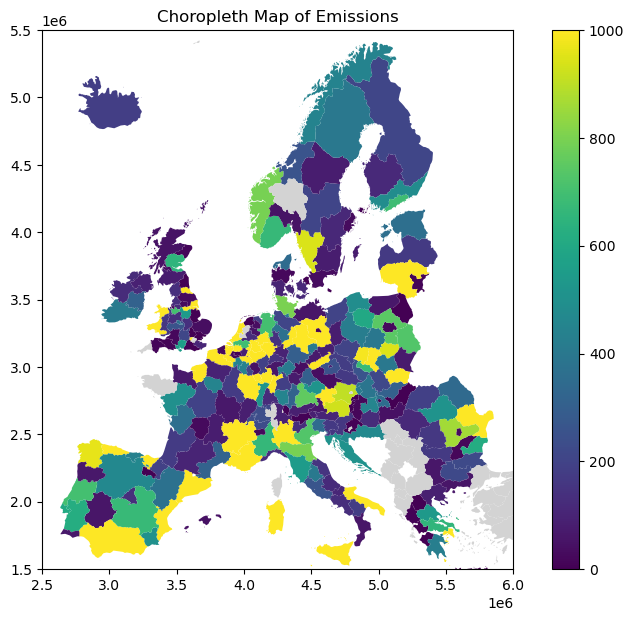

In [12]:
##task4K
new_url = "https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson"

sap = gpd.read_file(new_url)

sap = sap.set_index('id')

nuts = sap.query("LEVL_CODE == 2").to_crs(3035)


gdf_2 = gdf.to_crs(3035)

join_2 = gdf_2.sjoin(nuts)

groupby2 = join_2.groupby("NUTS_ID").Emissions_ETS_2014.sum()/5000

groupby2 = groupby2.reindex(nuts.index)


nuts.plot(figsize=(10,7), column=groupby2, vmax=1000,legend=True, missing_kwds=dict(color='lightgrey'))

plt.ylim(1.5e6, 5.5e6)

plt.xlim(2.5e6, 6e6)

plt.title("Choropleth Map of Emissions")

In [13]:
# Task 4l
naps = sap.query("LEVL_CODE == 3 and CNTR_CODE == 'AT'").to_crs(3035)

saps3= gdf[gdf['Country'] == 'Austria'].to_crs(3035)

joined_3 = saps3.sjoin(naps)

group_by_3 = joined_3.groupby("NUTS_ID").Emissions_ETS_2014.sum()

group_by_3 = group_by_3.reindex(naps.index)

nut_3_high = joined_3.loc[joined_3['NUTS_ID'] == group_by_3.idxmax()]

print("The NUTS-3 region in Austria with the highest industry emissions has a NUTS ID of %s." % group_by_3.idxmax())


The NUTS-3 region in Austria with the highest industry emissions has a NUTS ID of AT312.


In [14]:
comp_names = nut_3_high [["CompanyName","Subsector"]]

comp_names

,CompanyName,Subsector
1,voestalpine AG,Iron and steel
9,Nettingsdorfer Service Center,Paper and printing
1100,DSM Life Science Products Intern,Chemical industry
1625,Ziegelwerk Neuhofen K.F. u. DI H. Obermair Gmb...,Non-metallic mineral products
1627,Ziegelwerk Pichler Wels Gesellschaft m.b.H.,Non-metallic mineral products
1630,Dr. Franz Feurstein Gesellschaft m.b.H.,Paper and printing
1647,Leitl Spannton Gesellschaft m.b.H.,Non-metallic mineral products
1677,voestalpine Stahl GmbH,Cement
1681,Martin Pichler Ziegelwerk GmbH.,Non-metallic mineral products
1684,Wienerberger Ziegelindustrie GmbH,Non-metallic mineral products
